In [1]:
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import Berger_Fernandes_Lu_Tosaria_Wang_Baseline as facial_functions

Using TensorFlow backend.


In [3]:
workDir = os.getcwd()

In [4]:
df_train, df_test = facial_functions.read_train_and_test(
                                        os.path.join(workDir, "data", "training.csv"),
                                        os.path.join(workDir, "data", "test.csv"))
df_train.head()

FileNotFoundError: [Errno 2] File b'C:\\Users\\miber\\Dropbox\\Data_Science_Master\\3_Trimester\\w207-machine-learning\\Assignments\\w207-project-final\\data\\training.csv' does not exist: b'C:\\Users\\miber\\Dropbox\\Data_Science_Master\\3_Trimester\\w207-machine-learning\\Assignments\\w207-project-final\\data\\training.csv'

In [5]:
kaggle_train = facial_functions.preprocess_pixels(df_train)
kaggle_train.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,238,236,237,238,240,240,239,241,241,243,...,33,29,30,34,39,49,62,70,75,90
1,219,215,204,196,204,211,212,200,180,168,...,1,1,1,1,1,1,1,1,1,1
2,144,142,159,180,188,188,184,180,167,132,...,64,60,56,61,70,69,71,78,78,77
3,193,192,193,194,194,194,193,192,168,111,...,1,1,1,1,1,1,1,1,1,1
4,147,148,160,196,215,214,216,217,219,220,...,33,34,37,37,43,46,83,140,170,176


Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')
left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_c

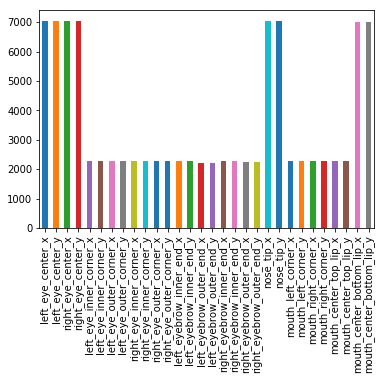

In [17]:
labels = facial_functions.create_labels(df_train,0,30) 
print(labels.columns)
print(labels.isnull().sum())
# The same information displayed visually
labels.describe().loc['count'].plot.bar()

In [6]:
kaggle_test = facial_functions.preprocess_pixels(df_test)
kaggle_test.head()

,0,1,2,3,4,5,6,7,8,9,...,9206,9207,9208,9209,9210,9211,9212,9213,9214,9215
0,182,183,182,182,180,180,176,169,156,137,...,6,14,28,28,24,18,12,8,5,5
1,76,87,81,72,65,59,64,76,69,42,...,156,152,162,169,168,159,191,228,211,168
2,177,176,174,170,169,169,168,166,166,166,...,1,1,1,1,1,1,1,1,1,1
3,176,174,174,175,174,174,176,176,175,171,...,144,143,141,142,143,142,142,142,142,140
4,50,47,44,101,144,149,120,58,48,42,...,254,254,254,253,255,236,174,175,175,165


In [19]:
norm_x_train, labels_no_na = facial_functions.separate_non_missing(kaggle_train, labels, normalize=True)

Correct shape? (2140, 9216)
Correct shape? (2140, 30)


In [35]:
train_data, train_labels, val_data, val_labels = facial_functions.split_train_and_test(norm_x_train, 
                                                                                       labels_no_na, 
                                                                                       percent=.8,
                                                                                       seed=123)

validation set shape (20%): (428, 9216) (428, 30)
train set shape (80%): (1712, 9216) (1712, 30)


In [38]:
val_data, val_labels = facial_functions.reshape_image(val_data, val_labels)

val feature shape (428, 96, 96, 1) val labels shape (428, 30)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 30)                276510    
_________________________________________________________________
dense_12 (Dense)             (None, 30)                930       
Total params: 277,440
Trainable params: 277,440
Non-trainable params: 0
_________________________________________________________________
None
Train on 1712 samples, validate on 428 samples
Epoch 1/100
1712/1712 [==============================] - 1s 792us/step - loss: 289.5222 - mean_squared_error: 289.5222 - r_square: 0.1807 - rmse: 15.6074 - val_loss: 137.0117 - val_mean_squared_error: 137.0117 - val_r_square: 0.6133 - val_rmse: 11.6060
Epoch 2/100
1712/1712 [==============================] - 1s 525us/step - loss: 135.2796 - mean_squared_error: 135.2796 - r_square: 0.6182 - rmse: 11.5199 - val_loss: 116.3504 - val_mean_squared_error: 116.3504 - val_r_square: 0

1712/1712 [==============================] - 1s 458us/step - loss: 19.1779 - mean_squared_error: 19.1779 - r_square: 0.9459 - rmse: 4.2712 - val_loss: 33.7470 - val_mean_squared_error: 33.7470 - val_r_square: 0.9048 - val_rmse: 5.6895
Epoch 65/100
1712/1712 [==============================] - 1s 458us/step - loss: 25.6627 - mean_squared_error: 25.6627 - r_square: 0.9277 - rmse: 4.8397 - val_loss: 80.0940 - val_mean_squared_error: 80.0940 - val_r_square: 0.7735 - val_rmse: 8.8691
Epoch 66/100
1712/1712 [==============================] - 1s 463us/step - loss: 35.3903 - mean_squared_error: 35.3903 - r_square: 0.9000 - rmse: 5.6162 - val_loss: 65.4530 - val_mean_squared_error: 65.4530 - val_r_square: 0.8150 - val_rmse: 8.0120
Epoch 67/100
1712/1712 [==============================] - 1s 458us/step - loss: 45.8588 - mean_squared_error: 45.8588 - r_square: 0.8705 - rmse: 6.6058 - val_loss: 56.0324 - val_mean_squared_error: 56.0324 - val_r_square: 0.8416 - val_rmse: 7.3889
Epoch 68/100
1712/171

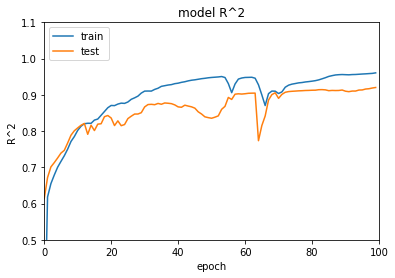

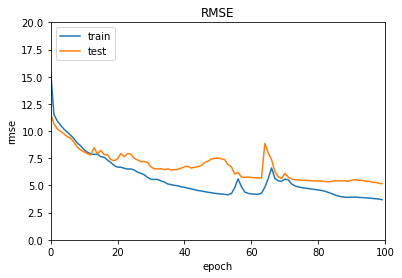

Validation RMSE: 5.1628487444369595
Performance increase relative to baseline: -0.0%


In [51]:
model, total_time = facial_functions.run_baseline_model(train_data, train_labels, val_data, val_labels, 
                                                        epochs=100, lr=.01, seed=123)

In [ ]:
cnn_model, cnn_total_time = facial_functions.run_cnn_model(train_data, train_labels, val_data, val_labels, 
                                                        epochs=10, lr=.01, baseline=model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12800)             0         
__________

In [52]:
import importlib
importlib.reload(facial_functions)

<module 'Berger_Fernandes_Lu_Tosaria_Wang_Baseline' from 'C:\\Users\\afern\\Desktop\\Git\\w207-project-final\\Berger_Fernandes_Lu_Tosaria_Wang_Baseline.py'>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg

from sklearn.metrics import classification_report

from keras.models import Sequential 
from keras.layers import Dense, Dropout, Activation, Conv1D, Conv2D, Flatten, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from keras import optimizers

np.random.seed(0)

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

#PW: added warning ignore
import warnings
warnings.filterwarnings('ignore')
import time